# Pulling and Serving Data from BOSS Demo
This notebook is for demonstrating proof of concept code that can pull data cubes from BOSS and slice the cube into servable "views" that annotators can immediately begin labeling.

In [2]:
#Dependencies
import sys
sys.path.insert(0, "../")
import boss_parse
import boss_serve
import boss_annotate
import pickle
import matplotlib.pyplot as plt


## 1. Pull data from BOSS using NeuroData Resource
The code below uses ND resource to pull a cube from the Collman data thats 1000x1000x5 large. The cube is just from the EM channel. Metadata will be attached to the data file in the form of a Python dictionary object containing all relevant metadata information.

The function will also the data and metadata in a binary format using pickle. This step is just so storing and loading the data cube becomes much easier.

In [2]:
boss_parse.get_collman_em_cube("edef359a8de270163c911dcef5d467a72348d68d", #token, bad right now but it's just proof ok
                               [0,5],
                               [0,1000],
                               [0,1000])

#### Loading metadata and data from Collman data cube:

In [3]:
metacube = pickle.load(open("./01_00_00.pickle",'rb'))

Metadata= 
{'id': '01_00_00', 'dim': [[0, 5], [0, 1000], [0, 1000]], 'annotaters': []}


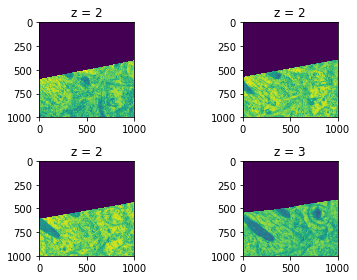

In [18]:
print("Metadata= \n" + str(metacube["metadata"]))
f, grid = plt.subplots(2,2)
grid[0,0].imshow(metacube["data"][0,:,:])
grid[0,0].set_title("z = " + str(2))
grid[0,1].imshow(metacube["data"][1,:,:])
grid[0,1].set_title("z = " + str(2))
grid[1,0].imshow(metacube["data"][2,:,:])
grid[1,0].set_title("z = " + str(2))
grid[1,1].imshow(metacube["data"][3,:,:])
grid[1,1].set_title("z = " + str(3))
f.tight_layout()

plt.show()

## 2. Serve Single View of Cube to Annotator as PNG
Now, we will provide a script that gives a single view of the cube to the annotator as a PNG file. The labeler can then load the image into FIJI or any other editor and annotate.

In [22]:
boss_serve.save_bookmark(0, "bookmark.pickle") ## Instantiate Pickled bookmark to keep track of what slice is to be served
boss_serve.load_slice("01_00_00.pickle", "bookmark.pickle") ## creates file as bookmark_cube id.png

##### Load in PNG from directory as proof!

z = 0 cube id= 01_00_00


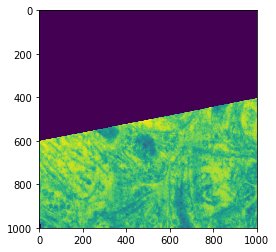

In [17]:
annotation, slice_info = boss_annotate.load_annotation("0_01_00_00.png")
print("z = " + str(slice_info[0]) + " cube id= " + str(slice_info[1]))
plt.imshow(annotation)
plt.show()